In [1]:
#matplotlib notebook
from numpy import *
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
from matplotlib.pyplot import *

In [2]:
### Model Input as Dictionary
modelInput = '''[0:3,0,0:3]
                [0:3,1:3,0]
                [0,1:3,0:3]
                [1:2:2,1:2:2,1:2:2]
                '''
#modelInput = '''[0:2, 0:2, 0:2]'''
def compartments(modelInput):
    modelInput = [a.strip() for a in modelInput.strip().split("\n")]
    cmpts = {}
    for a in modelInput:
        a = a.strip('[').strip(']').split(',')
        #print 'a:', a

        arr, temp = [], []
        for i in a[:3]:
            if ':' in i:
                t = [int(a) for a in i.split(':')]
                try:
                    arr.append(range(t[0],t[1],t[2]))
                    temp.append(t[2])
                except IndexError:
                    arr.append(range(t[0],t[1]))
                    temp.append(1)
            else:
                arr.append([int(i)])
                temp.append(1)

        arr += temp
        #print 'arr:', arr


        for i in arr[0]:
            for j in arr[1]:
                for k in arr[2]:
                    mName = str(i) + '-' + str(j) + '-' + str(k)
                    mVal = [i,j,k] + arr[3:]
                    cmpts.update({mName: mVal})
    return cmpts


cmpts = compartments(modelInput)
for k in sorted(cmpts.iterkeys()):
    print "%s: %s" % (k, cmpts[k])

0-0-0: [0, 0, 0, 1, 1, 1]
0-0-1: [0, 0, 1, 1, 1, 1]
0-0-2: [0, 0, 2, 1, 1, 1]
0-1-0: [0, 1, 0, 1, 1, 1]
0-1-1: [0, 1, 1, 1, 1, 1]
0-1-2: [0, 1, 2, 1, 1, 1]
0-2-0: [0, 2, 0, 1, 1, 1]
0-2-1: [0, 2, 1, 1, 1, 1]
0-2-2: [0, 2, 2, 1, 1, 1]
1-0-0: [1, 0, 0, 1, 1, 1]
1-0-1: [1, 0, 1, 1, 1, 1]
1-0-2: [1, 0, 2, 1, 1, 1]
1-1-0: [1, 1, 0, 1, 1, 1]
1-1-1: [1, 1, 1, 2, 2, 2]
1-2-0: [1, 2, 0, 1, 1, 1]
2-0-0: [2, 0, 0, 1, 1, 1]
2-0-1: [2, 0, 1, 1, 1, 1]
2-0-2: [2, 0, 2, 1, 1, 1]
2-1-0: [2, 1, 0, 1, 1, 1]
2-2-0: [2, 2, 0, 1, 1, 1]


In [3]:
def checkGeometry(comp, cmpts):
    sCubes = compartments(comp)
    #for k in sorted(sCubes.iterkeys()):
    #    print "%s: %s" % (k, sCubes[k])
        
    #sCubes = {'2-2-2': [2, 2, 2, 1, 1, 1]}
    gap = []
    overlap = []
    for sc in sCubes.values():
        temp = []
        i = 0
        for c in cmpts.values():
            if (sc[0]  >=c[0]      and sc[1]  >=c[1]      and sc[2]  >=c[2] and \
                sc[0]+1<=c[0]+c[3] and sc[1]+1<=c[1]+c[4] and sc[2]+1<=c[2]+c[5]):
                i += 1
                temp.append(c)
                
        if i>=2:
            overlap.append([sc, temp])
        if i==0:
            gap.append(sc)
    
    if gap==[] and overlap==[]:
        return True
    else:
        print 'gaps:', gap
        print 'overlaps:', overlap
        return False
    
sCubes = "[0:3, 0:3, 0:3]"
print checkGeometry(sCubes, cmpts)

True


In [4]:
a = [0, 0, 0, 1, 1, 1]
b = [0, 1, 0, 1, 1, 1]

def isNeighbour(a,b):
    nbr = (a[0] <= b[0]+b[3] and a[0]+a[3] >= b[0]) and \
          (a[1] <= b[1]+b[4] and a[1]+a[4] >= b[1]) and \
          (a[2] <= b[2]+b[5] and a[2]+a[5] >= b[2])
    
    
    if nbr:
        if a[0] == b[0]+b[3] or a[0]+a[3] == b[0]:
            dy = min(abs(a[1]+a[4] - b[1]), abs(b[1]+b[4] - a[1]))
            dz = min(abs(a[2]+a[5] - b[2]), abs(b[2]+b[5] - a[2]))
            
            if dy*dz==0:
                return False
            else:
                #print a, b, '\n', 'dy, dz =', dy, dz
                return dy*dz
        
        elif a[1] == b[1]+b[4] or a[1]+a[4] == b[1]:
            dx = min(abs(a[0]+a[3] - b[0]), abs(b[0]+b[3] - a[0]))
            dz = min(abs(a[2]+a[5] - b[2]), abs(b[2]+b[5] - a[2]))
            
            if dx*dz==0:
                return False
            else:
                #print a, b, '\n', 'dx, dz =', dx, dz
                return dx*dz
        
        elif a[2] == b[2]+b[5] or a[2]+a[5] == b[2]:
            dx = min(abs(a[0]+a[3] - b[0]), abs(b[0]+b[3] - a[0]))
            dy = min(abs(a[1]+a[4] - b[1]), abs(b[1]+b[4] - a[1]))
            
            if dx*dy==0:
                return False
            else:
                #print a, b, '\n', 'dx, dy =', dx, dy
                return dx*dy
    
    else:
        return False

print isNeighbour(b,a)

1


In [15]:
def getNeighbours(c, cmpts):
    k, v = c.items()[0]
    nbrs = []
    for nk,nv in cmpts.items():
        if not k==nk:
            area = isNeighbour(v, nv)
            if area:
                nbrs.append(nk)
                
    return nbrs
                
nbrhood = {}
for k,v in cmpts.items():
    nbrhood.update({k: getNeighbours({k: v}, cmpts)})
    

'''for k in sorted(cmpts.iterkeys()):
    print "%s: %s" % (k, cmpts[k])'''
    
for k in sorted(nbrhood.iterkeys()):
    print "%s: %s" % (k, nbrhood[k])
a=0

0-0-0: ['0-1-0', '1-0-0', '0-0-1']
0-0-1: ['0-1-1', '1-0-1', '0-0-0', '0-0-2']
0-0-2: ['0-1-2', '1-0-2', '0-0-1']
0-1-0: ['0-1-1', '0-0-0', '1-1-0', '0-2-0']
0-1-1: ['0-2-1', '0-1-2', '0-1-0', '1-1-1', '0-0-1']
0-1-2: ['0-2-2', '0-1-1', '1-1-1', '0-0-2']
0-2-0: ['0-2-1', '0-1-0', '1-2-0']
0-2-1: ['0-2-2', '0-1-1', '1-1-1', '0-2-0']
0-2-2: ['0-2-1', '0-1-2', '1-1-1']
1-0-0: ['1-0-1', '0-0-0', '1-1-0', '2-0-0']
1-0-1: ['1-0-0', '1-0-2', '1-1-1', '0-0-1', '2-0-1']
1-0-2: ['1-0-1', '1-1-1', '0-0-2', '2-0-2']
1-1-0: ['0-1-0', '1-2-0', '1-0-0', '1-1-1', '2-1-0']
1-1-1: ['0-2-1', '0-1-2', '0-2-2', '0-1-1', '1-2-0', '1-0-1', '1-0-2', '1-1-0', '2-1-0', '2-2-0', '2-0-2', '2-0-1']
1-2-0: ['1-1-1', '1-1-0', '0-2-0', '2-2-0']
2-0-0: ['1-0-0', '2-1-0', '2-0-1']
2-0-1: ['1-0-1', '1-1-1', '2-0-2', '2-0-0']
2-0-2: ['1-0-2', '1-1-1', '2-0-1']
2-1-0: ['1-1-1', '1-1-0', '2-2-0', '2-0-0']
2-2-0: ['1-2-0', '1-1-1', '2-1-0']


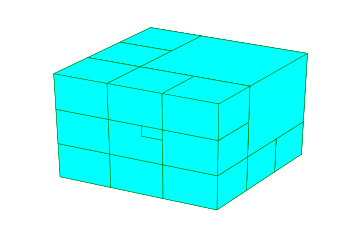

In [6]:
def getVertices(c):
    v = [c[:3]]
    v.append([c[0]+c[3], c[1],      c[2]])
    v.append([c[0]+c[3], c[1]+c[4], c[2]])
    v.append([c[0],      c[1]+c[4], c[2]])
    v.append([c[0],      c[1],      c[2]+c[5]])
    v.append([c[0]+c[3], c[1],      c[2]+c[5]])
    v.append([c[0]+c[3], c[1]+c[4], c[2]+c[5]])
    v.append([c[0],      c[1]+c[4], c[2]+c[5]])
    
    # list of sides' polygons of figure
    verts = [[v[0], v[1], v[2], v[3]],
             [v[4], v[5], v[6], v[7]], 
             [v[0], v[1], v[5], v[4]], 
             [v[2], v[3], v[7], v[6]], 
             [v[1], v[2], v[6], v[5]],
             [v[4], v[7], v[3], v[0]], 
             [v[2], v[3], v[7], v[6]]]
    
    return array(verts)

fig = figure()
ax = fig.add_subplot(111, projection='3d')

# set x,y,z limits
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_zlim(0, 3)

ax.axis('off')

# plot sides
for c in cmpts.values():
    verts = getVertices(c)
    ax.add_collection3d(Poly3DCollection(verts, 
                        facecolors='cyan', linewidths=0.5, 
                        edgecolors='g', alpha=.1))

show()